In [21]:
import pandas as pd
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#y = pd.Series(data["target"])

# Comment the different variables of this dataset
# Notice how they are all numerical - KMeans cannot deal with categorical variables
X.head()

# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [22]:
# Clustering:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [3]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

# Explore the cluster assignment in the original dataset
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,7
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,7
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,7
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,7
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,5


In [4]:
kmeans.inertia_ 

942.574352846782

In [11]:
for i in range(1,20):    
    kmeans = KMeans(n_clusters=i,
                    init="random",
                    n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                    max_iter=2,
                    tol=0,
                    algorithm="full",
                    random_state=1234)
    kmeans.fit(X_prep)
    print(kmeans.inertia_)

2313.999999999999
1676.0207755067097
1370.7222300317048
1224.292740025497
1135.3646394526043
1063.5533624172738
1015.6532786904813
974.0164391751503
950.1476349762747
909.8377751842404
889.1207166701242
851.5991840545573
821.9190112339867
781.6356712360994
777.2088092328743
756.8490010387873
726.7362351807549
715.6490749449149
708.0360439118728


In [12]:
for i in range(1,20):    
    kmeans = KMeans(n_clusters=3,
                    init="random",
                    n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                    max_iter=i,
                    tol=0,
                    algorithm="full",
                    random_state=1234)
    kmeans.fit(X_prep)
    print(kmeans.inertia_)

1523.3266288545246
1370.7222300317048
1290.4236861972943
1282.7643530005018
1280.305302082813
1279.9661527749458
1279.9661527749458
1279.9661527749458
1279.9661527749458
1279.9661527749458
1279.9661527749458
1279.9661527749458
1279.9661527749458
1279.9661527749458
1279.9661527749458
1279.9661527749458
1279.9661527749458
1279.9661527749458
1279.9661527749458


In [13]:
for i in range(1,20):    
    kmeans = KMeans(n_clusters=3,
                    init="random",
                    n_init=i,  # try with 1, 4, 8, 20, 30, 100...
                    max_iter=3,
                    tol=0,
                    algorithm="full",
                    random_state=1234)
    kmeans.fit(X_prep)
    print(kmeans.inertia_)

1296.680174354311
1290.4236861972943
1290.4236861972943
1290.4236861972943
1290.4236861972943
1287.5425167771064
1287.5425167771064
1287.5425167771064
1278.1892543151055
1278.1892543151055
1278.1892543151055
1278.1892543151055
1278.1892543151055
1278.1892543151055
1278.1892543151055
1278.1892543151055
1278.1892543151055
1278.1892543151055
1277.928488844643


In [14]:
for i in range(1,20):    
    kmeans = KMeans(n_clusters=3,
                    init="random",
                    n_init=2,  # try with 1, 4, 8, 20, 30, 100...
                    max_iter=3,
                    tol=i,
                    algorithm="full",
                    random_state=1234)
    kmeans.fit(X_prep)
    print(kmeans.inertia_)

1290.4236861972943
1296.680174354311
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048
1370.7222300317048


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

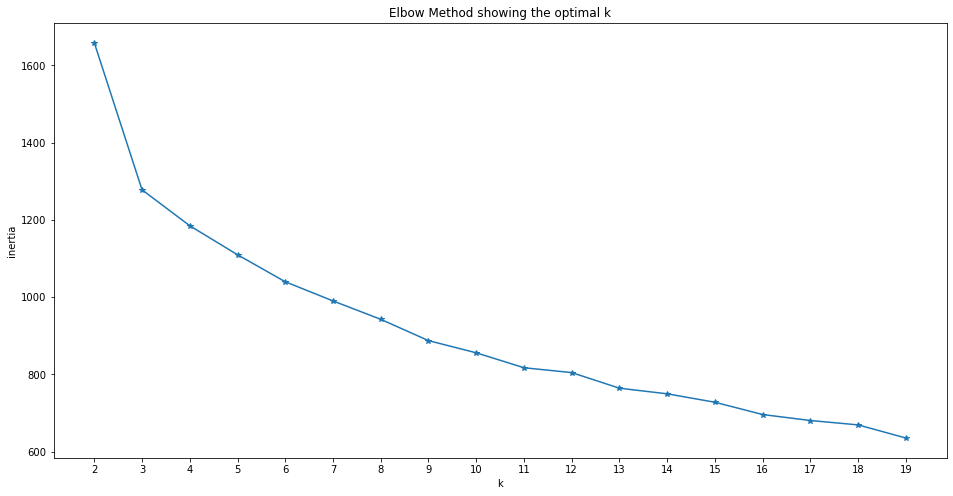

In [5]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, marker = '*')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

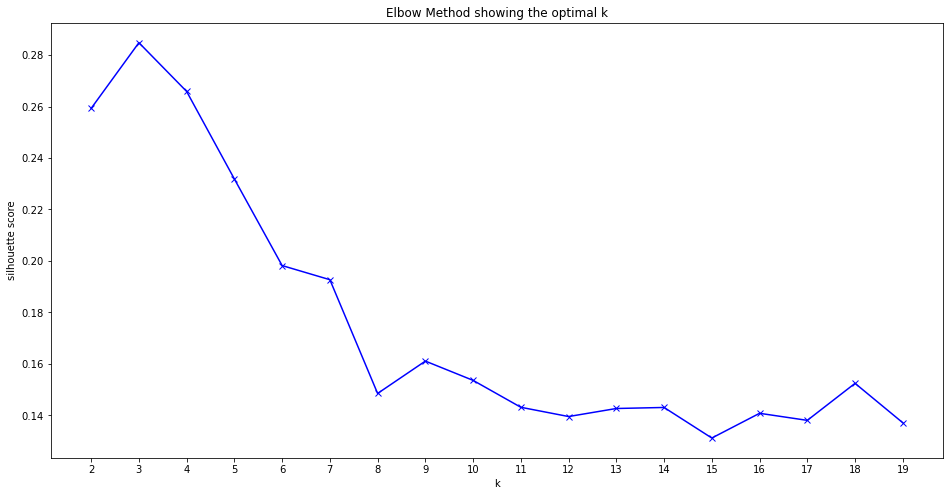

In [6]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [20]:
data=pd.read_csv('/Users/kb/Downloads/ComputerSpecs.txt', sep=" ")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 5
